<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [3]:
import pandas as pd
import psycopg2
import plotly.express as px
import matplotlib.pyplot as plt

In [5]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [6]:
# текст запроса
query_3_1 = f'''
    select count(id) as cnt
    
    from VACANCIES
'''

In [7]:
# результат запроса
df_customers = pd.read_sql_query(query_3_1, connection)
df_customers

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\171644492.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql_query(query_3_1, connection)


,cnt
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [8]:
query_3_2 = f'''
    select count(id) as cnt
    
    from employers
'''

In [9]:
df_employers = pd.read_sql_query(query_3_2, connection)
df_employers

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\1816481496.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers = pd.read_sql_query(query_3_2, connection)


,cnt
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [10]:
query_3_3 = f'''
    select count(id) as cnt
    
    from areas
'''

In [11]:
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\2018224393.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,cnt
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [12]:
query_3_4 = f'''
    select count(id) as cnt
    
    from industries
'''

In [13]:
df = pd.read_sql_query(query_3_4, connection)
df

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\2172479966.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,cnt
0,294


***

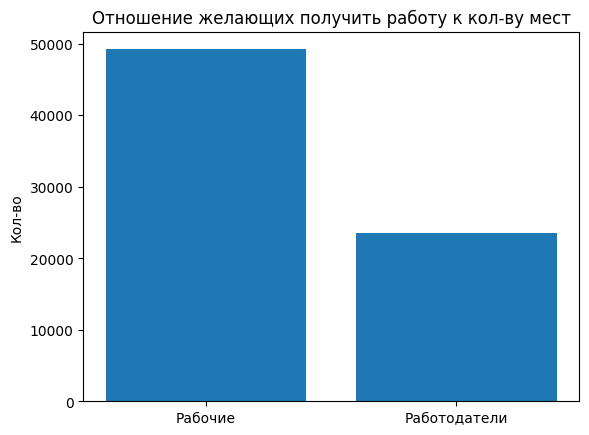

In [55]:

fig, ax = plt.subplots()

ax.bar(x=['Рабочие', 'Работодатели'], height=[df_customers.iloc[0,0], df_employers.iloc[0,0]])

plt.ylabel('Кол-во')
plt.title('Отношение желающих получить работу к кол-ву мест')

plt.show()

Выводы: Для 1 работодателя есть в 2 раза больше желающих

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [15]:
query_4_1 = f'''
    select count(v.id) as cnt,
            a.name
    
    from vacancies v
    
    JOIN areas a on a.id = v.area_id
    
    group by a.name
    
    order by 1 DESC
'''

In [16]:
df_vac_area = pd.read_sql_query(query_4_1, connection)
df_vac_area

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\1489879823.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vac_area = pd.read_sql_query(query_4_1, connection)


,cnt,name
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [17]:
query_4_2 = f'''
    select count(*) cnt
    
    from vacancies 
    
    where (salary_from is not null) or (salary_to is not null)
    '''

In [18]:
df_salaryisnull = pd.read_sql_query(query_4_2, connection)
df_salaryisnull

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\3700883666.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salaryisnull = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [19]:
query_4_3 = f'''
        select  ROUND(avg(salary_from)),
                 ROUND(avg(salary_to))
        
        from vacancies

'''

In [20]:
df_mean_salary = pd.read_sql_query(query_4_3, connection)
df_mean_salary

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\737618091.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mean_salary = pd.read_sql_query(query_4_3, connection)


,round,round
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [56]:
query_4_4 = f'''
        select count(*),
                schedule,
                employment
        
        from vacancies 
        
        group by 2, 3
        
        order by 1 desc   
          
        '''

In [57]:
df_schedule = pd.read_sql_query(query_4_4, connection)
df_schedule

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\415894432.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_schedule = pd.read_sql_query(query_4_4, connection)


,count,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [23]:
query_4_5 = f'''
            select experience,
                    count(*)
            
            from vacancies
            
            where experience is not null
            
            group by 1
            
            order by count(*) ASC
            '''

In [24]:
df_exp = pd.read_sql_query(query_4_5, connection)
df_exp

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\1938218004.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_exp = pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

Подавляющее число людей ищет работу на весь день с полной занятостью, также у большинства (больше 50%) опыт работы от 1 до 3 лет, средняя зарплата повышается с 71065 тыс.р до 110537 тыс.р (на 40_000)

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [25]:
query_5_1 = f'''
            select e.name 
            
            from employers e 
            
            JOIN vacancies v on v.employer_id = e.id 
            
            group by 1
            
            order by count(*) desc
            
            LIMIT 5
            '''

In [26]:
df_top_employers = pd.read_sql_query(query_5_1, connection)
df_top_employers

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\3904939250.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_employers = pd.read_sql_query(query_5_1, connection)


,name
0,Яндекс
1,Ростелеком
2,Тинькофф
3,СБЕР
4,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [27]:
query_5_2 = f'''
            select 
                a.name "Название региона",
                count(e.id) as employ_cnt,              
                count(v.id) as vac_cnt                  
            
            from areas a 
            
            LEFT JOIN vacancies v ON a.id = v.area_id   
            LEFT JOIN employers e ON e.area = a.id
            
            WHERE v.id is null
            
            GROUP BY a.name 

            order by 2 desc
            '''
# нельзя использовать INNER JOIN т.к. он убирает все строки с пустыми значениями, которые мы и ищем.

In [28]:
df_area_employers = pd.read_sql_query(query_5_2, connection)
df_area_employers

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\1612811969.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_area_employers = pd.read_sql_query(query_5_2, connection)


,Название региона,employ_cnt,vac_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [58]:
query_5_3 = f'''
            select  e.name "Pаботодатель",
                    count(distinct v.area_id) "кол-во регионов с его вакансиями"

            from employers e

            LEFT JOIN vacancies v ON v.employer_id = e.id
            
            group by e.id
            
            order by 2 DESC         
'''

In [59]:
df_area_vacancies = pd.read_sql_query(query_5_3, connection)
df_area_vacancies

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\2110982183.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_area_vacancies = pd.read_sql_query(query_5_3, connection)


,Pаботодатель,кол-во регионов с его вакансиями
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [31]:
query_5_4 = f'''
            select count(*)
            
            from EMPLOYERS_INDUSTRIES ei 
            
            RIGHT JOIN EMPLOYERS e ON ei.employer_id = e.id         
            LEFT JOIN INDUSTRIES i ON i.id = ei.industry_id         
            
            where i.name is null
            '''
# если название в таблице industries отсутсвует => не указана сфера деятельности
# я не знаю может ли быть id У безымянной сферы деятельности, но похоже что нет

In [32]:
query_5_4 = f'''
            select count(*) cnt
            
from employers e

    left join employers_industries ei on e.id = ei.employer_id      
                                                                                    
    where ei.industry_id is null
'''
# локаничнее, но при оговорке что id у безымянной сферы деятельности отсутствует,  иначе стоит приклеить и 3 таблицу-связку

In [33]:
df_cnt_employ = pd.read_sql_query(query_5_4, connection)
df_cnt_employ

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\4219760608.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_employ = pd.read_sql_query(query_5_4, connection)


,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [34]:
query_5_5 = f'''
            select e.name 
        from employers e
        
        LEFT JOIN employers_industries ei on e.id = ei.employer_id
        
        group by 1
        
        having count(ei.employer_id) = 4
        
        order by 1 ASC
'''

In [35]:
df_company_name = pd.read_sql_query(query_5_5, connection)
df_company_name

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\2022654292.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_company_name = pd.read_sql_query(query_5_5, connection)


,name
0,101 Интернет
1,21vek.by
2,2ГИС
3,2К
4,4 пикселя +
...,...
1131,ЮРИОН
1132,ЮТИП Технологии
1133,ЯКласс
1134,ЯрНео


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [36]:
query_5_6 = f'''
        select ei.employer_id                         
        from employers_industries ei

        LEFT JOIN employers e on e.id = ei.employer_id
        LEFT JOIN industries i on i.id = ei.industry_id

        where i.name = 'Разработка программного обеспечения'
        group by 1
        order by 1 ASC
'''
# не e.name т.к. имена повторяются, поэтому смотри employer_id 

In [37]:
df_company_PS = pd.read_sql_query(query_5_6, connection)
print(f'Кол-во работодателей где сфера деятельности - Разработка: {df_company_PS.shape[0]}')

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\3846300066.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_company_PS = pd.read_sql_query(query_5_6, connection)


Кол-во работодателей где сфера деятельности - Разработка: 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

# <center> Парсинг

In [38]:
import requests
from bs4 import BeautifulSoup

url='https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response=requests.get(url)
page=BeautifulSoup(response.text,'html.parser')

cities_here=str(page.find('table', class_="standard"))
cities_here=cities_here.split('title="')[3:]

million_cities=[]
for i in cities_here:
    million_cities.append(i.split('">')[0])

million_cities = tuple(million_cities)      # sql принимает кортежи, а не списки

---

Способ через формирование подссылки url, и чтением таблиц (преданализ сайта) 

(буду рад если дадите комментарии по этому процессу более подробно)

In [61]:
import urllib.parse as req

path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)

url # ссылка на таблицы странницы
df = pd.read_html(url)[1]  # подгоняем вручную, номер 1, т.к. на странице много таблиц.  

display(df)

million_cities = []
for row in df['Город']:
    million_cities.append(row)

million_cities = tuple(million_cities)

,№,Город,"Население, тыс. чел. (на 1 января 2023 года)","Население, тыс. чел. (итоги переписи 2021 года)[5]",Прирост относительно переписи-2010,"Население, тыс. чел. (итоги переписи 2010 года)[6]"
0,1,Москва,13 098,13 010,"13,1 %",11 504
1,2,Санкт-Петербург,5 598,5 602,"14,8 %",4 880
2,3,Новосибирск,1 635,1 634,"10,9 %",1 474
3,4,Екатеринбург,1 539,1 544,"14,4 %",1 350
4,5,Казань,1 315,1 309,"14,4 %",1 144
5,6,Нижний Новгород,1 213,1 226,"−2,0 %",1 251
6,7,Красноярск,1 197,1 188,"21,6 %",977
7,8,Челябинск,1 183,1 190,"5,3 %",1 130
8,9,Самара,1 164,1 173,"0,3 %",1 169
9,10,Уфа,1 158,1 145,"7,8 %",1 062


---

In [39]:
query_5_7 = f'''
        WITH temp AS
        (select a.name as name,
                count(*) cnt

from employers e

             join vacancies v on e.id = v.employer_id

             join areas a on a.id = v.area_id

where e.name = 'Яндекс'

          and a.name in {million_cities}

group by a.id)

SELECT * from temp

UNION ALL

SELECT 'Total',
        sum(cnt)

FROM temp

Order by 2 ASC
'''   
# * пишем один подзапрос через WITH, чтобы потом к нему обращаться (+ производительность)
# * условие на название компании = Яндекс и город, который является миллионником (!!! IN принимает ТОЛЬКО кортеж, список - Х )
# * группировка по айди города, или по его названию, т.к. в этом случае названия уникальны
# * Total в одинарные кавычки, т.к. в них пишется VALUE, т.к. у нас есть подзапрос, то можно просуммировать столбец (ОЧЕНЬ УДОБНО)

In [40]:
df_yandex = pd.read_sql_query(query_5_7, connection)
df_yandex

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\3573594888.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_yandex = pd.read_sql_query(query_5_7, connection)


,name,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

Выводы: Яндекс - основной работадатель в России, у 8 тыс из 24 тыс. работодатели не указывают сферу деятельности, возможно они универсалы. Для регионов миллионников, где работадатель - Яндекс, на каждый город есть от 20 до 50 вакансий, в зависимости от расстояния до столицы и экономической важности для государства.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [41]:
query_6_1 = '''
        select count(*)
    from vacancies
        where lower(name) like '%data%' or lower(name) like '%данн%'
'''

In [42]:
df_data = pd.read_sql_query(query_6_1, connection)
df_data

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\1767019284.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_data = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [43]:
query_6_2 = f'''
    select count(name) 
        from vacancies 
        
     where  ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name ILIKE '%ML%')
    AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL))
    
    AND (name ILIKE '%junior%'
    OR experience ILIKE '%Нет опыта%'
    OR employment ILIKE '%Стажировка%')   
'''
# Cкобки в логике - ОБЯЗАТЕЛЬНЫ, иначе логика может нарушится, и неверный результат

In [44]:
df_junior = pd.read_sql_query(query_6_2, connection)
df_junior

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\3587822140.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_junior = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [45]:
query_6_3 = f'''
    select count(name) 
        from vacancies 
    where  
        ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name LIKE '%ML%') AND (name NOT LIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%'))
    AND (key_skills iLike '%SQL%' OR key_skills ilike '%postgres%')
    
'''
# ВСЕГДА смотри на AND, он должен сравниваться с полным выражением из OR ===>>> СКОБОЧКИ 

In [46]:
df_junior_skills = pd.read_sql_query(query_6_3, connection)
df_junior_skills

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\1654785.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_junior_skills = pd.read_sql_query(query_6_3, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [47]:
query_6_4 = f'''
    select count(name) 
        from vacancies 
    where  
        ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name LIKE '%ML%') AND (name NOT LIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%'))
    AND (key_skills iLike '%Python%')
    
'''

In [48]:
df_python_skills = pd.read_sql_query(query_6_4, connection)
df_python_skills

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\4146842466.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_python_skills = pd.read_sql_query(query_6_4, connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [49]:
query_6_5 = f'''
            select round(avg(length(key_skills) - length(replace(key_skills, CHR(9), ''))+1), 2) 
    from vacancies 

    where  
    
        ((name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name LIKE '%ML%') AND (name NOT LIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%'))
    AND (key_skills is not null)


'''
# Гениальная идея посчитать через lenght и вычитая CHR(9) - табуляция, так еще и добавляя +1 (пример: A_B_C символов 3, табуляций 2)
# ML нужен именно в таком регистре, поэтому LIKE, но нужно учесть вариант htML. через ILIKE

In [50]:
df_key_skills = pd.read_sql_query(query_6_5, connection)
df_key_skills

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\1306386489.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_key_skills = pd.read_sql_query(query_6_5, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [52]:
query_6_6 = f'''
    select experience,
       round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to)), 0) avg_sal
    from vacancies
        where (name ilike '%data scientist%'
       or name ilike '%data science%'
       or name ilike '%исследователь данных%'
       or (name like '%ML%' and name not ilike '%HTML%')
       or name ilike '%machine learning%' or name ilike '%машинн%обучен%'
       )

    and  (salary_from is not null or salary_to is not null)
group by experience
'''
# coalesce - работает по "убыванию важности" (в лучшем случае -> среднем -> худшем), комбинация с другими агрегатными функциями - работает
# !!! для анализа вакансий есть нюанс: ML - в вакансиях должен писаться именно в верхнем регистре, НО нужно учесть варианты: htML.
# проверка на заполненность хотя бы 1 ячейки с з\п, и группировка по опыту работы 

In [62]:
df_salary = pd.read_sql_query(query_6_6, connection)
df_salary

C:\Users\meleh\AppData\Local\Temp\ipykernel_1836\4024701068.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary = pd.read_sql_query(query_6_6, connection)


,experience,avg_sal
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

Мы узнали, что кол-во джунов по DS равняется 51 человеку, также существует 201 вакансия со специалистами в SQL/postgres. Видим что Python не очень популярен среди ключевых навыков в вакансиях: всего 351 из 49 тыс. Также мы знаем, что в среднем в вакансиях указываются 6-7 ключевых навыков специалиста. Также мы получили список (очень примерный) средних зарплат в зависимости от опыта специалиста.

# Общий вывод по проекту

В общем главным работадателем является Яндекс, если учитывать нашу выборку в 49 тыс. вакансий, мы видели мало джунов на hh, что наверное подразумевает, что они сразу пристроились после обучения, тем самым после получения опыта 1-2 года, они ищут новую работу, и как мы видели число вакансий заметно выросло в сравнении с людьми "Без опыта". Ну, и логично что с повышением опыта работы з/п увеличиваются :)

Продолжение анализа: думаю зависит от задачи, он может быть направлен на анализ конкурентов, ищущих работу, или углубление в детали с предполагаемой зарплатой, а то мне показались цифры крайне грубо округленными.